In [2]:
#고객 유지를위한 행동을 예측하십시오. 
#모든 관련 고객 데이터를 분석하고 집중된 고객 유지 프로그램을 개발할 수 있습니다.

#고객이 구독을 취소했는지 여부를 지정하는 이탈 레이블과 함께 정리 된 고객 활동 데이터 (기능)로 구성된 
# Orange Telecom의 Churn Dataset은 예측 모델을 개발하는 데 사용됩니다. 
#여기에서 두 가지 데이터 세트를 사용할 수 있습니다. churn-80 및 churn-20 데이터 세트를 다운로드 할 수 있습니다.

#두 세트는 동일한 배치에서 나왔지만 80/20 비율로 분할되었습니다. 
# ML 모델을 개발하는 데 더 많은 데이터가 필요한 경우가 많으므로 학습 및 교차 검증 목적으로 더 큰 세트 
#(즉, churn-80)를 사용하고 최종 테스트 및 모델 성능을 위해 더 작은 세트 (즉, churn-20)를 사용하겠습니다.

In [3]:
#churn80은 train, churn20은 test용

# 전처리

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

churn_train=pd.read_csv("C:/Users/SAMSUNG/Desktop/train_churn.csv")
churn_test=pd.read_csv("C:/Users/SAMSUNG/Desktop/test_churn.csv")
print(churn_train.shape)
churn_train.head(3)

(667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


In [5]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
State                     2666 non-null object
Account length            2666 non-null int64
Area code                 2666 non-null int64
International plan        2666 non-null object
Voice mail plan           2666 non-null object
Number vmail messages     2666 non-null int64
Total day minutes         2666 non-null float64
Total day calls           2666 non-null int64
Total day charge          2666 non-null float64
Total eve minutes         2666 non-null float64
Total eve calls           2666 non-null int64
Total eve charge          2666 non-null float64
Total night minutes       2666 non-null float64
Total night calls         2666 non-null int64
Total night charge        2666 non-null float64
Total intl minutes        2666 non-null float64
Total intl calls          2666 non-null int64
Total intl charge         2666 non-null float64
Customer service calls    2666 non-null int64


In [6]:
print(churn_train['Churn'].value_counts())
print(churn_test['Churn'].value_counts())

False    572
True      95
Name: Churn, dtype: int64
False    2278
True      388
Name: Churn, dtype: int64


In [7]:
churn_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [8]:
import pandas as pd

churn_train=pd.get_dummies(churn_train[['State','International plan','Voice mail plan']]) # 원핫인코딩 실행
churn_test=pd.get_dummies(churn_test[['State','International plan','Voice mail plan']]) # 원핫인코딩 실행

In [9]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 55 columns):
State_AK                  667 non-null uint8
State_AL                  667 non-null uint8
State_AR                  667 non-null uint8
State_AZ                  667 non-null uint8
State_CA                  667 non-null uint8
State_CO                  667 non-null uint8
State_CT                  667 non-null uint8
State_DC                  667 non-null uint8
State_DE                  667 non-null uint8
State_FL                  667 non-null uint8
State_GA                  667 non-null uint8
State_HI                  667 non-null uint8
State_IA                  667 non-null uint8
State_ID                  667 non-null uint8
State_IL                  667 non-null uint8
State_IN                  667 non-null uint8
State_KS                  667 non-null uint8
State_KY                  667 non-null uint8
State_LA                  667 non-null uint8
State_MA                  667 non-null u

In [10]:
X_train = churn_train.iloc[:,:-1]
y_train = churn_train.iloc[:,-1]
X_test = churn_test.iloc[:,:-1]
y_test = churn_test.iloc[:,-1]

# 모델적합_XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=0,booster='gbtree')

xgb_clf.fit(X_train,y_train,early_stopping_rounds=100,
           eval_metric="auc", eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')

[0]	validation_0-auc:1	validation_1-auc:1
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_

In [12]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7],'min_child_weight':[1,3],'colsample_bytree':[0.5,0.75]}

gridcv=GridSearchCV(xgb_clf,param_grid=params)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,eval_metric="auc",
          eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV optimum paramater:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.543175	validation_1-auc:0.495224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.553464	validation_1-auc:0.489207
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1


C:\Users\SAMSUNG\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1-auc:1
[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation_0-auc:1	validation_1-auc:1
[30]	validation_0-auc:1	validation_1-auc:1
[31]	validation_0-auc:1	validation_1-auc:1
[32]	validat

[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1-auc:1
[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation

[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1-auc:1
[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-

[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1-auc:1
[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation_0-auc:1	validation_1-auc:1
[30]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[0]	validation_0-auc:1	valida

[20]	validation_0-auc:1	validation_1-auc:1
[21]	validation_0-auc:1	validation_1-auc:1
[22]	validation_0-auc:1	validation_1-auc:1
[23]	validation_0-auc:1	validation_1-auc:1
[24]	validation_0-auc:1	validation_1-auc:1
[25]	validation_0-auc:1	validation_1-auc:1
[26]	validation_0-auc:1	validation_1-auc:1
[27]	validation_0-auc:1	validation_1-auc:1
[28]	validation_0-auc:1	validation_1-auc:1
[29]	validation_0-auc:1	validation_1-auc:1
[30]	validation_0-auc:1	validation_1-auc:1
Stopping. Best iteration:
[0]	validation_0-auc:1	validation_1-auc:1

[0]	validation_0-auc:1	validation_1-auc:1
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	val

In [13]:
#GridSearchCV optimum paramater: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 1}
#ROC AUC: 1.0000

In [14]:
from xgboost import plot_importance
from matplotlib import pyplot

xgb_clf = XGBClassifier(n_estimators=100,random_state=0,colsample_bytree=0.5,max_depth=5,min_child_weight=1)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=200
            ,eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-auc:0.556912	validation_1-auc:0.495243
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.572148	validation_1-auc:0.491446
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

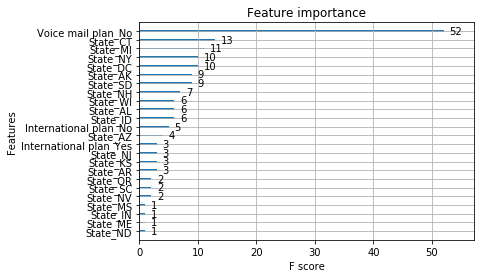

In [15]:
# plot feature importance
plot_importance(xgb_clf)
pyplot.show()

#과적합의 문제
#변수중요도에서 국가 변수에 중요성이 치중되어 있음

# 모델 적합_LightGBM

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="auc",eval_set=evals,
            verbose=True)

lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.495134
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 1	valid_0's binary_logloss: 0.425059
[3]	valid_0's auc: 1	valid_0's binary_logloss: 0.369181
[4]	valid_0's auc: 1	valid_0's binary_logloss: 0.323167
[5]	valid_0's auc: 1	valid_0's binary_logloss: 0.284493
[6]	valid_0's auc: 1	valid_0's binary_logloss: 0.251527
[7]	valid_0's auc: 1	valid_0's binary_logloss: 0.223135
[8]	valid_0's auc: 1	valid_0's binary_logloss: 0.198487
[9]	valid_0's auc: 1	valid_0's binary_logloss: 0.176959
[10]	valid_0's auc: 1	valid_0's binary_logloss: 0.158061
[11]	valid_0's auc: 1	valid_0's binary_logloss: 0.141405
[12]	valid_0's auc: 1	valid_0's binary_logloss: 0.126674
[13]	valid_0's auc: 1	valid_0's binary_logloss: 0.113609
[14]	valid_0's auc: 1	valid_0's binary_logloss: 0.101994
[15]	valid_0's auc: 1	valid_0's binary_logloss: 0.0916457
[16]	valid_0's auc: 1	valid_0's binary_logloss: 0.0824104
[17]	valid_0's auc: 1	valid_0's b

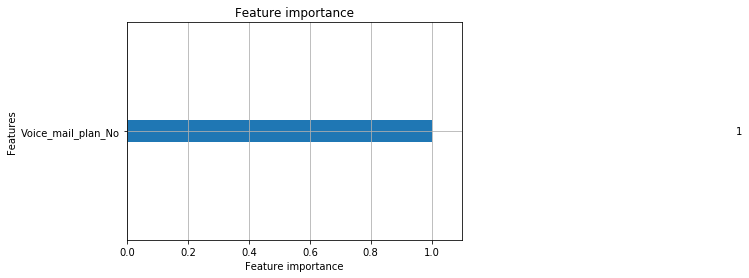

In [21]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

plot_importance(lgbm_clf)
pyplot.show()

#과적합, 변수중요도 판단불가;;